### Breast Cancer Detection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout,BatchNormalization

# import stochastic gradient descent(Adam optimizer)
from tensorflow.keras.optimizers import Adam 

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
X = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [8]:
y = cancer.target

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify = y)

In [11]:
X_train.shape

(455, 30)

In [12]:
X_test.shape

(114, 30)

In [13]:
# Standardization and conversion in to numpy form for reshape operation 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [15]:
X_train[0].shape

(30, 1)

In [16]:
input_shape = X_train[0].shape

In [17]:
model = Sequential()

model.add(Conv1D(32,2,activation='relu',input_shape= input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.20))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))

# model.add(MaxPool1D(2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [20]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.00005),metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/60
455/455 [==============================] - 4s 9ms/sample - loss: 0.9326 - accuracy: 0.5758 - val_loss: 0.6654 - val_accuracy: 0.8070
Epoch 2/60
455/455 [==============================] - 0s 478us/sample - loss: 0.6796 - accuracy: 0.6791 - val_loss: 0.6316 - val_accuracy: 0.7895
Epoch 3/60
455/455 [==============================] - 0s 522us/sample - loss: 0.5526 - accuracy: 0.7385 - val_loss: 0.6005 - val_accuracy: 0.7632
Epoch 4/60
455/455 [==============================] - 0s 901us/sample - loss: 0.4621 - accuracy: 0.7978 - val_loss: 0.5731 - val_accuracy: 0.7368
Epoch 5/60
455/455 [==============================] - 0s 853us/sample - loss: 0.4185 - accuracy: 0.8176 - val_loss: 0.5490 - val_accuracy: 0.7368
Epoch 6/60
455/455 [==============================] - 0s 888us/sample - loss: 0.4001 - accuracy: 0.8264 - val_loss: 0.5267 - val_accuracy: 0.7193
Epoch 7/60
455/455 [==============================] - 0s 855us/sample - loss: 0.

455/455 [==============================] - 0s 502us/sample - loss: 0.1068 - accuracy: 0.9626 - val_loss: 0.0949 - val_accuracy: 0.9561
Epoch 57/60
455/455 [==============================] - 0s 758us/sample - loss: 0.1044 - accuracy: 0.9648 - val_loss: 0.0946 - val_accuracy: 0.9561
Epoch 58/60
455/455 [==============================] - 0s 730us/sample - loss: 0.1189 - accuracy: 0.9538 - val_loss: 0.0948 - val_accuracy: 0.9649
Epoch 59/60
455/455 [==============================] - 0s 726us/sample - loss: 0.1031 - accuracy: 0.9648 - val_loss: 0.0948 - val_accuracy: 0.9737
Epoch 60/60
455/455 [==============================] - 0s 741us/sample - loss: 0.1225 - accuracy: 0.9495 - val_loss: 0.0942 - val_accuracy: 0.9649


In [22]:
history.history

{'loss': [0.9326103965004722,
  0.6796465880268223,
  0.5526178458234766,
  0.4621454762888479,
  0.4184754898259928,
  0.4000554961326358,
  0.382185697555542,
  0.35901238055347084,
  0.27967308586115364,
  0.2979996220096127,
  0.3062801199954945,
  0.24880232074103512,
  0.2332849065026084,
  0.226788785136663,
  0.24367258561836494,
  0.1845421245464912,
  0.17939902858419732,
  0.21485170216842012,
  0.1997598558664322,
  0.19551060658234817,
  0.14286710241666206,
  0.14573329560213036,
  0.17218878531808054,
  0.17337887084091103,
  0.19482458918304232,
  0.17979682173047748,
  0.12224972107253232,
  0.13468138956270376,
  0.14027005369355391,
  0.14083971767635137,
  0.12050665279666146,
  0.1397865917820197,
  0.14878178861115005,
  0.11307230420451571,
  0.18917410629136222,
  0.14455525894741436,
  0.10827034179192896,
  0.13057507158635737,
  0.14886179664632776,
  0.10432208408038694,
  0.11336448971223045,
  0.11939997227637322,
  0.09604730442330077,
  0.096170545320261

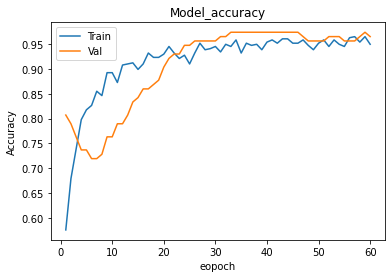

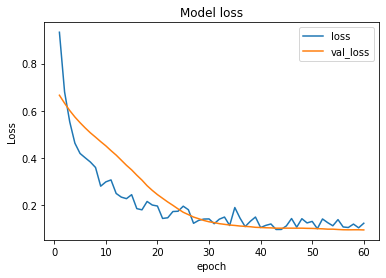

In [23]:
# ploting training and validation accuracy
epochs = range(1,61)
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('eopoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# ploting training and validation loss
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'],loc='upper right')

In [24]:
model.evaluate(X_test,y_test)

114/114 [==============================] - 0s 184us/sample - loss: 0.0942 - accuracy: 0.9649


[0.09420985904963393, 0.9649123]

In [25]:
print(tf.__version__)

2.1.0
